In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Scenario : You are looking to book an Airbnb for your trip to Tokyo, Japan
# We will explore the listings based on various criteria such as price, rating review scores, types of listings, and more

# reading in csv file from Airbnb for Tokyo, Japan
airbnb_japan=pd.read_csv('listings.csv',parse_dates=['host_since'])

# brief look at the data
airbnb_japan.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45120811,https://www.airbnb.com/rooms/45120811,20220922235233,2022-09-23,city scrape,"Guest House 7 min to Disney, New open","It can accommodate up to 10people, travelers w...",NaN,https://a0.muscache.com/pictures/3a6eab2d-f767...,289820207,...,4.65,3.83,4.52,M120025987,t,1,1,0,0,0.95
1,40069353,https://www.airbnb.com/rooms/40069353,20220922235233,2022-09-23,city scrape,留连之家民宿,独立门户的一套房、进入玄关后右边鞋柜出入用雨伞以及冰箱微波炉垃圾桶等、左边洗衣机厨房操作台电...,整个街区就像童话般的生活氛围！因为是处在东京与千叶的城乡结合部，所以周边有很多的超市便利店餐...,https://a0.muscache.com/pictures/8c58c2e3-da4a...,39884149,...,4.43,4.43,4.43,M120020038,f,2,2,0,0,0.42
2,39568366,https://www.airbnb.com/rooms/39568366,20220922235233,2022-09-23,city scrape,Museum House！202探し歩き回る時間がもったいない!最寄り駅徒歩2分ディズニー25分,最寄駅から徒歩2分。近所に多くの飲食店があります。ディズニーリゾートまでは、直行バス(約25...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,184746369,...,5.00,5.00,5.00,M120020993,t,2,2,0,0,0.26
3,25414793,https://www.airbnb.com/rooms/25414793,20220922235233,2022-09-23,city scrape,Free boxing training! 2 bunk beds dormitory.,I had been traveling around the world past nin...,Our Backpackers hostel is located right near f...,https://a0.muscache.com/pictures/b653cc64-d69d...,162227924,...,4.95,4.57,4.84,Hotels and Inns Business Act | 相模原市保健所 | 相模原市指...,f,2,0,1,1,1.41
4,9032305,https://www.airbnb.com/rooms/9032305,20220922235233,2022-09-23,city scrape,Good Location! Near Tokyo Disneyland and Airport!,This house is close to JR Motoyawata sta. conv...,Ichikawa-city is kind of bed town. You can see...,https://a0.muscache.com/pictures/dc63fc49-89ea...,47146177,...,4.96,4.64,4.85,M120000370,f,1,1,0,0,1.47


In [3]:
# checking column names, checking for nulls and other things we may need to clean
# data dictionary for the columns was obtained from Airbnb
# link - https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

airbnb_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            9823 non-null   int64         
 1   listing_url                                   9823 non-null   object        
 2   scrape_id                                     9823 non-null   int64         
 3   last_scraped                                  9823 non-null   object        
 4   source                                        9823 non-null   object        
 5   name                                          9823 non-null   object        
 6   description                                   9792 non-null   object        
 7   neighborhood_overview                         7069 non-null   object        
 8   picture_url                                   9823 non-null   object

In [4]:
# dropping columns we will not be using 
airbnb_japan.drop(airbnb_japan.columns[[1,2,3,4,5,6,7,8,10,11,13,14,15,16,17,19,20,21,24,25,27,29,35,36,37,38,39,42,43,44,45,46,47,48,49,52,53,54,55,59,60,68,71,72,73]],axis=1,inplace=True)

In [5]:
airbnb_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              9823 non-null   int64         
 1   host_id                         9823 non-null   int64         
 2   host_since                      9823 non-null   datetime64[ns]
 3   host_is_superhost               9792 non-null   object        
 4   host_listings_count             9823 non-null   int64         
 5   host_total_listings_count       9823 non-null   int64         
 6   host_identity_verified          9823 non-null   object        
 7   neighbourhood_cleansed          9823 non-null   object        
 8   latitude                        9823 non-null   float64       
 9   longitude                       9823 non-null   float64       
 10  property_type                   9823 non-null   object        
 11  room

In [6]:
# renaming some of the columns
rename_columns={'review_scores_rating':'overall_score',
                'review_scores_accuracy':'accuracy_score',
                'review_scores_cleanliness':'cleanliness_score',
                'review_scores_checkin':'checkin_score',
                'review_scores_communication':'communication_score',
                'review_scores_location':'location_score',
                'review_scores_value':'value_score'
               }

airbnb_japan.rename(columns=rename_columns,inplace=True)

In [7]:
score_column=['overall_score','accuracy_score','cleanliness_score','checkin_score','communication_score','location_score','value_score']

In [8]:
# We want to use price and multiple review scores to base our decision on which place to stay
# If the listing has a null value in any of these columns we will drop it

airbnb_japan.dropna(subset=['price','overall_score','accuracy_score','cleanliness_score','checkin_score','communication_score','location_score','value_score'],inplace=True)

In [9]:
# converting price from object to float
airbnb_japan['price']=airbnb_japan['price'].apply(lambda x : float(x.replace("$","").replace(",","")))

In [10]:
# according to the data dictionary price is recorded in local currency, so we will change it to USD
# the current conversion rate is 131.88 Japanese Yen : 1 USD
airbnb_japan['price'] = airbnb_japan['price'].apply(lambda x : round(x/131.88,2))

In [11]:
# renaming the column since it is in USD now
airbnb_japan.rename(columns={'price':'usd_price'},inplace=True)

# checking the conversion rate was properly applied
airbnb_japan['usd_price']

0       131.94
1        24.76
2        75.83
3        34.12
4        83.41
         ...  
9818     94.78
9819     75.83
9820    113.74
9821     54.25
9822     30.18
Name: usd_price, Length: 8288, dtype: float64

In [12]:
airbnb_japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288 entries, 0 to 9822
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8288 non-null   int64         
 1   host_id                         8288 non-null   int64         
 2   host_since                      8288 non-null   datetime64[ns]
 3   host_is_superhost               8267 non-null   object        
 4   host_listings_count             8288 non-null   int64         
 5   host_total_listings_count       8288 non-null   int64         
 6   host_identity_verified          8288 non-null   object        
 7   neighbourhood_cleansed          8288 non-null   object        
 8   latitude                        8288 non-null   float64       
 9   longitude                       8288 non-null   float64       
 10  property_type                   8288 non-null   object        
 11  room

In [13]:
# we see that the columns usd_price and accommodates have entries where the value is 0
# this seems like an error in user input so we will exclude those as well
print(airbnb_japan.min(numeric_only=True))

airbnb_japan=airbnb_japan[(airbnb_japan['usd_price']>0)&(airbnb_japan['accommodates']>0)]

id                                197677.00000
host_id                           322234.00000
host_listings_count                    1.00000
host_total_listings_count              1.00000
latitude                              35.52141
longitude                            139.04543
accommodates                           0.00000
usd_price                              0.00000
minimum_nights                         1.00000
availability_30                        0.00000
number_of_reviews                      1.00000
number_of_reviews_ltm                  0.00000
number_of_reviews_l30d                 0.00000
overall_score                          1.00000
accuracy_score                         1.00000
cleanliness_score                      1.00000
checkin_score                          1.00000
communication_score                    1.00000
location_score                         1.00000
value_score                            1.00000
calculated_host_listings_count         1.00000
reviews_per_m

In [14]:
airbnb_japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8267 entries, 0 to 9822
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8267 non-null   int64         
 1   host_id                         8267 non-null   int64         
 2   host_since                      8267 non-null   datetime64[ns]
 3   host_is_superhost               8267 non-null   object        
 4   host_listings_count             8267 non-null   int64         
 5   host_total_listings_count       8267 non-null   int64         
 6   host_identity_verified          8267 non-null   object        
 7   neighbourhood_cleansed          8267 non-null   object        
 8   latitude                        8267 non-null   float64       
 9   longitude                       8267 non-null   float64       
 10  property_type                   8267 non-null   object        
 11  room

In [15]:
# exporting cleaned dataset to use in Tableau 
airbnb_japan.to_csv('cleaned_airbnb.csv')

<font size='40'><b>Tableau - Listings by neighborhoods/wards</font>

<img src='listing_count_by_ward.png' width=1000 height=600/>

<h2><b>Tokyo Metro Map</h2>

<img src='tokyo_metro_map.png' width=1000 height=600/>

In [16]:
# after plotting the listings in Tableau, we see that most of them are situated in the greater metropolitan area of Tokyo
# there are a small number of listings in the neighborhoods to the west
# for our stay, we want to book a place within the green area as it has more options for transportation, so we will exclude those in red

In [17]:
# looking at the neighborhoods by listing count
counts_by_ward=airbnb_japan.groupby(['neighbourhood_cleansed']).count().sort_values('id')
counts_by_ward

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,...,overall_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,calculated_host_listings_count,reviews_per_month
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
Hinohara Mura,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kiyose Shi,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Musashimurayama Shi,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Akishima Shi,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Higashikurume Shi,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Okutama Machi,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Kodaira Shi,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Hamura Shi,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Musashino Shi,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [18]:
# we extract those with 20 or more listings
wards=counts_by_ward[counts_by_ward['id']>=20].sort_values('id',ascending=False)
wards

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,...,overall_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,calculated_host_listings_count,reviews_per_month
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
Shinjuku Ku,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,...,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615
Taito Ku,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,...,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
Sumida Ku,896,896,896,896,896,896,896,896,896,896,...,896,896,896,896,896,896,896,896,896,896
Toshima Ku,640,640,640,640,640,640,640,640,640,640,...,640,640,640,640,640,640,640,640,640,640
Shibuya Ku,507,507,507,507,507,507,507,507,507,507,...,507,507,507,507,507,507,507,507,507,507
Minato Ku,321,321,321,321,321,321,321,321,321,321,...,321,321,321,321,321,321,321,321,321,321
Chuo Ku,312,312,312,312,312,312,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312
Ota Ku,312,312,312,312,312,312,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312
Setagaya Ku,261,261,261,261,261,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261


In [19]:
# taking the names of the neighborhoods with 20+ listings
included_wards=(wards.index)
included_wards

Index(['Shinjuku Ku', 'Taito Ku', 'Sumida Ku', 'Toshima Ku', 'Shibuya Ku',
       'Minato Ku', 'Chuo Ku', 'Ota Ku', 'Setagaya Ku', 'Nakano Ku',
       'Katsushika Ku', 'Edogawa Ku', 'Kita Ku', 'Suginami Ku', 'Koto Ku',
       'Chiyoda Ku', 'Shinagawa Ku', 'Arakawa Ku', 'Itabashi Ku', 'Bunkyo Ku',
       'Adachi Ku', 'Meguro Ku', 'Nerima Ku'],
      dtype='object', name='neighbourhood_cleansed')

In [20]:
# dataset with the 23 included neighborhoods
tokyo=airbnb_japan[airbnb_japan['neighbourhood_cleansed'].isin(included_wards)]
tokyo

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,overall_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,calculated_host_listings_count,reviews_per_month
0,45120811,289820207,2019-08-28,f,1,1,t,Edogawa Ku,35.65802,139.89506,...,4.30,4.52,4.04,4.65,4.65,3.83,4.52,t,1,0.95
1,40069353,39884149,2015-07-29,f,2,5,t,Edogawa Ku,35.71645,139.92855,...,4.50,4.64,4.14,4.64,4.43,4.43,4.43,f,2,0.42
2,39568366,184746369,2018-04-17,f,2,4,t,Edogawa Ku,35.67108,139.90337,...,5.00,5.00,5.00,4.89,5.00,5.00,5.00,t,2,0.26
4,9032305,47146177,2015-10-21,t,1,1,t,Edogawa Ku,35.71470,139.92604,...,4.96,4.90,4.91,4.94,4.96,4.64,4.85,f,1,1.47
5,21687395,61890115,2016-03-07,f,20,116,t,Katsushika Ku,35.78078,139.90083,...,4.77,4.88,4.79,4.89,4.95,4.57,4.73,t,17,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,39936997,61890115,2016-03-07,f,20,116,t,Katsushika Ku,35.77880,139.90220,...,4.61,4.44,4.50,4.67,4.61,4.33,4.50,t,17,0.52
9816,13688434,61890115,2016-03-07,f,20,116,t,Katsushika Ku,35.77900,139.90062,...,4.56,4.72,4.56,4.89,4.85,4.51,4.62,t,17,1.90
9819,35851675,184746369,2018-04-17,f,2,4,t,Edogawa Ku,35.67096,139.90337,...,5.00,5.00,5.00,4.88,5.00,4.88,4.81,t,2,0.41
9820,39654828,61718416,2016-03-05,t,1,2,t,Itabashi Ku,35.80583,139.67727,...,4.80,4.83,4.89,4.91,4.89,4.70,4.70,f,1,1.34


In [21]:
# 1st factor to booking a place - Price
pricing=tokyo[['neighbourhood_cleansed','usd_price']]
pricing.describe()

,usd_price
count,8057.000000
mean,108.750772
std,787.127012
min,9.930000
25%,39.410000
50%,60.230000
75%,98.570000
max,67702.240000


Price Median : 60.23
Price Mean : 108.75077199950246


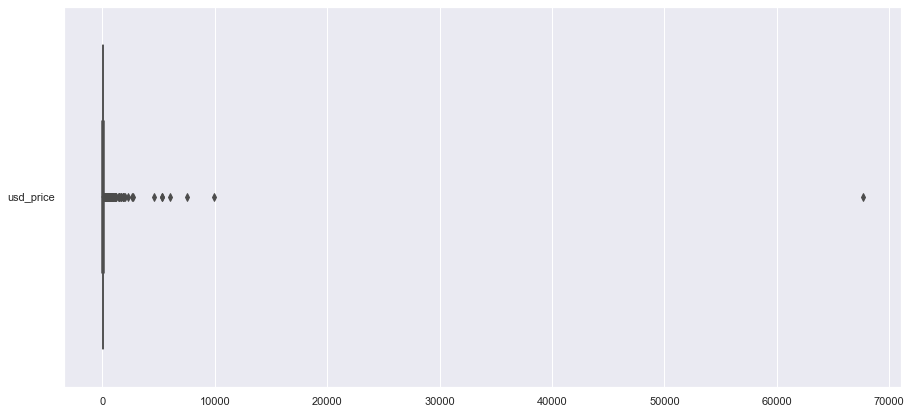

In [22]:
# distribution of prices, there are extreme outliers and not budget friendly at all
# the mean and median price is relatively low even with such huge outliers
sns.set(rc={'figure.figsize': (15,7)})
sns.boxplot(data=pricing,orient='h')
plt.savefig('price_boxplot.png')

print(f"Price Median : {pricing['usd_price'].median()}")
print(f"Price Mean : {pricing['usd_price'].mean()}")

In [23]:
# We will limit our search to listing that are <=$150 per day 
tokyo_budget=tokyo[tokyo['usd_price']<=150]
tokyo_budget.to_csv('tokyo_budget.csv')

Price Median : 52.99
Price Mean : 60.83


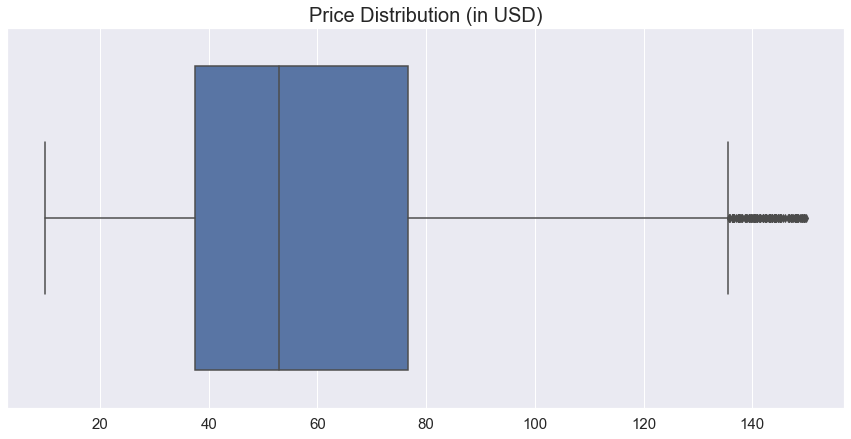

In [24]:
# plotting the new dataset with the budget in mind

pricing=tokyo_budget[['neighbourhood_cleansed','usd_price']]
sns.boxplot(data=pricing,orient='h')
plt.title('Price Distribution (in USD)',fontsize=20)
plt.yticks([])
plt.xticks(fontsize=15)
plt.savefig('budget_boxplot.png')

# We see a mean price of ~$60.83 and a median price of ~$52.99 per day, very budget friendly
print(f"Price Median : {pricing['usd_price'].median()}")
print(f"Price Mean : {round(pricing['usd_price'].mean(),2)}")

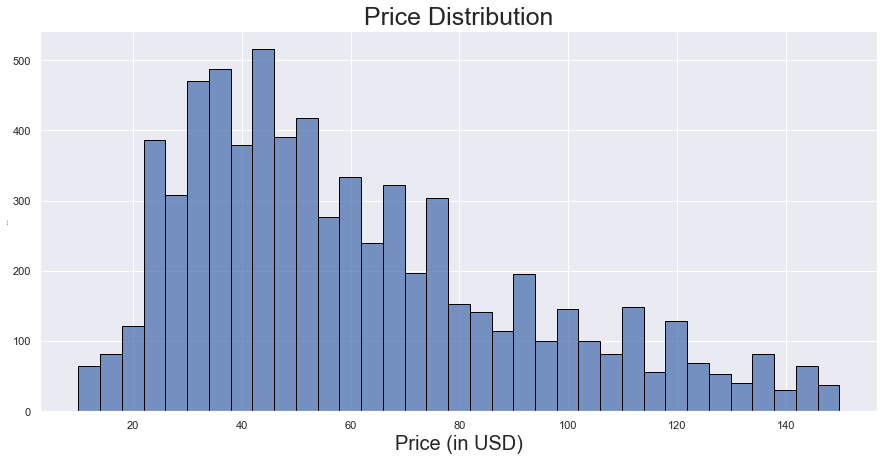

In [25]:
# histogram view
sns.histplot(data=pricing,x='usd_price',edgecolor='black')

plt.title('Price Distribution',fontsize=25)
plt.xlabel('Price (in USD)',fontsize=20)
plt.ylabel('Count',fontsize=2)
plt.savefig('price_histogram.png')
plt.show()

In [26]:
# price breakdown by neighborhoods, mean and median price rounded to 2 decimal places
# prices are quite budget friendly by either metric, some neighborhoods(such as Mintao Ku, Shibuya Ku, Chiyoda Ku) are still on the "higher end" 
# median usd price will be used as the metric for deciding our threshold 
price_chart=pricing.groupby('neighbourhood_cleansed').agg(avg_price=('usd_price','mean'),median_price=('usd_price','median')).round(2).sort_values('median_price')
price_chart

,avg_price,median_price
neighbourhood_cleansed,,
Adachi Ku,51.49,37.91
Arakawa Ku,53.04,43.29
Itabashi Ku,54.25,44.92
Sumida Ku,52.05,45.31
Nerima Ku,47.44,46.06
Koto Ku,51.48,46.15
Setagaya Ku,57.70,46.25
Kita Ku,57.66,48.78
Katsushika Ku,56.30,49.29


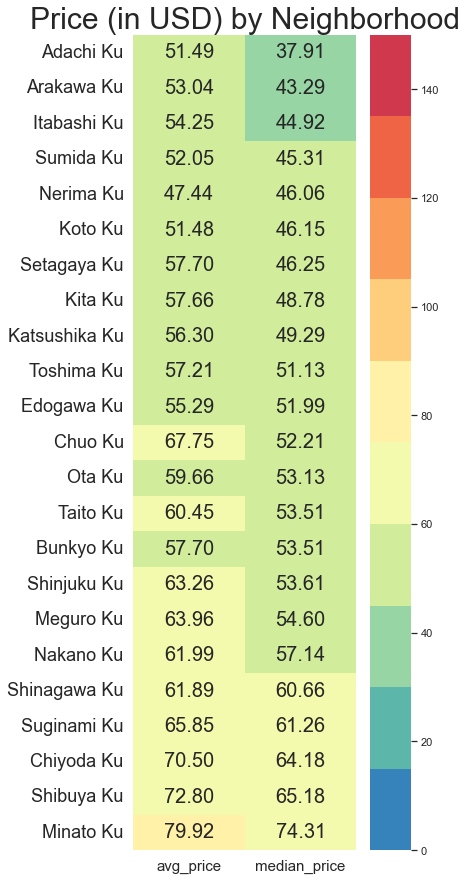

In [27]:
# storing above table in this format for better visuals
fig, ax = plt.subplots(figsize=(5,15))
colormap=sns.color_palette("Spectral_r",10)
sns.heatmap(price_chart,annot=True,fmt=".2f",vmin=0,vmax=150,cmap=colormap,annot_kws={"size":20})
plt.title('Price (in USD) by Neighborhood',fontsize=30)
plt.ylabel('')
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)

plt.savefig('price_by_neighborhood.png')
plt.show()

In [28]:
# 2nd factor to booking a place - Ratings/Review Scores
scores=tokyo_budget[['overall_score','accuracy_score','cleanliness_score','checkin_score','communication_score','location_score','value_score']]
scores.describe()

,overall_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score
count,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000
mean,4.647496,4.716523,4.619746,4.760432,4.759771,4.667974,4.623890
std,0.421810,0.398106,0.479679,0.376767,0.393407,0.373380,0.402028
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.530000,4.640000,4.500000,4.690000,4.710000,4.540000,4.500000
50%,4.750000,4.820000,4.750000,4.870000,4.870000,4.750000,4.690000
75%,4.900000,4.950000,4.920000,5.000000,5.000000,4.910000,4.850000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


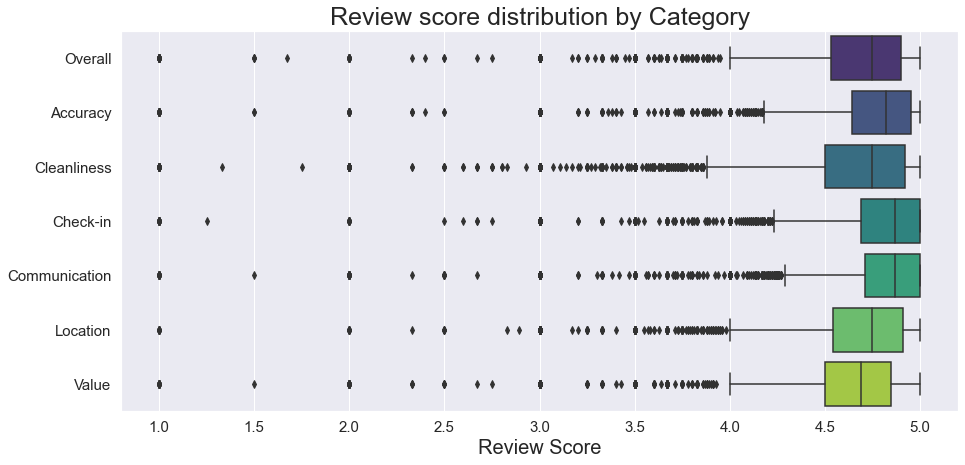


Review Scores (Median)
overall_score          4.75
accuracy_score         4.82
cleanliness_score      4.75
checkin_score          4.87
communication_score    4.87
location_score         4.75
value_score            4.69
dtype: float64


In [29]:
sns.set_context("notebook")

category_label=['Overall','Accuracy','Cleanliness','Check-in','Communication','Location','Value']
category_tick=np.arange(0,7)

# plotting the data, we can see the distrubtion of review scores
# ratings are skewed, which makes sense because places with lower review scores would impact people's likliness to book it and to lead to fewer bookings
# majority of review scores are distributed within the range of 4.5 to 5 across categories
# chances of finding a listing that is satisfatory or above average shouldn't be an issue

ax=sns.boxplot(data=scores,palette='viridis',orient='h')
plt.title('Review score distribution by Category',fontsize='25')
plt.xlabel('Review Score',fontsize='20')
plt.xticks(fontsize='15')
plt.yticks(category_tick,category_label,fontsize='15')

plt.savefig('score_distribution.png')
plt.show()

print(f"\nReview Scores (Median)\n{scores.median()}")

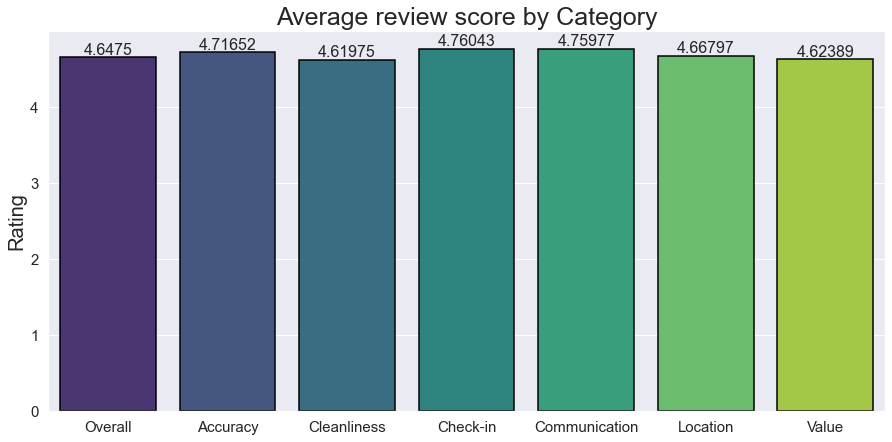

Review Scores (Average) 
overall_score          4.647496
accuracy_score         4.716523
cleanliness_score      4.619746
checkin_score          4.760432
communication_score    4.759771
location_score         4.667974
value_score            4.623890
dtype: float64


In [30]:
# after looking at the distribution of scores on a boxplot and seeing the median, we will chart the average scores too

ax=sns.barplot(data=scores,palette='viridis',ci=None,edgecolor='black',linewidth=1.5)
ax.bar_label(ax.containers[0],size=16)
plt.title("Average review score by Category",fontsize='25')
plt.ylabel("Rating",fontsize='20')
plt.yticks(fontsize='15')
plt.xticks(category_tick,category_label,fontsize='15')

plt.savefig('average_score_barchart.png')
plt.show()

print(f"Review Scores (Average) \n{scores.mean()}")

In [31]:
# 3rd factor to booking a place - Host
# it is important to have a host who is experienced, consistent, reliable, and able to deliver an unforgettable experience

# We get a bit picky with our criteria for finding a great place
# First we filter the listings by the conditions that 
# We will definite amazing host as having listings that fulfil the criteria of having 4.7+ score across all categories, having high listing

In [32]:
condition1=tokyo_budget[(tokyo_budget['overall_score']>=4.7)&(tokyo_budget['accuracy_score']>=4.7)&(tokyo_budget['cleanliness_score']>=4.7)&(tokyo_budget['checkin_score']>=4.7)&
                  (tokyo_budget['communication_score']>=4.7)&(tokyo_budget['location_score']>=4.7)&(tokyo_budget['value_score']>=4.7)]
condition1

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,overall_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,calculated_host_listings_count,reviews_per_month
2,39568366,184746369,2018-04-17,f,2,4,t,Edogawa Ku,35.67108,139.90337,...,5.00,5.00,5.00,4.89,5.00,5.00,5.00,t,2,0.26
12,50552035,336489274,2020-02-16,f,2,3,t,Itabashi Ku,35.79588,139.64047,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,2,0.73
14,776070,801494,2011-07-10,f,1,6,t,Kita Ku,35.73844,139.76917,...,4.97,4.96,4.93,4.97,4.97,4.85,4.91,t,1,1.92
15,1016831,5596383,2013-03-24,f,1,4,t,Setagaya Ku,35.65800,139.67134,...,4.94,4.92,4.80,4.93,4.98,4.91,4.88,f,1,1.83
19,1298200,6606987,2013-05-27,t,3,13,t,Katsushika Ku,35.73987,139.85176,...,4.93,4.94,4.97,4.96,4.97,4.73,4.88,t,3,3.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,8769079,45976684,2015-10-07,t,6,6,t,Kita Ku,35.80438,139.70995,...,4.95,4.86,4.88,5.00,4.98,4.77,4.77,f,6,0.81
9791,32155915,36119176,2015-06-18,f,5,12,t,Adachi Ku,35.82425,139.79846,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,5,0.03
9811,33922362,68009649,2016-04-20,f,5,8,t,Edogawa Ku,35.72327,139.92057,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,2,0.05
9819,35851675,184746369,2018-04-17,f,2,4,t,Edogawa Ku,35.67096,139.90337,...,5.00,5.00,5.00,4.88,5.00,4.88,4.81,t,2,0.41


In [33]:
# listing count for host within condition 1
host=condition1.groupby('host_id')['id'].count().sort_values(ascending=False)
print(host)

# top 5 host by descending listing count within condition 1
top5=host.index[:5]
top5

host_id
197405131    21
258668827    20
321365764    16
229627088    15
221625584    14
             ..
205162345     1
205130250     1
204098414     1
203667442     1
470308810     1
Name: id, Length: 831, dtype: int64


Int64Index([197405131, 258668827, 321365764, 229627088, 221625584], dtype='int64', name='host_id')

In [34]:
agg_dict={'host_since':['max'],'host_is_superhost':['max'],'host_listings_count':['max'],'host_total_listings_count':['max'],'host_identity_verified':['max'],
         'usd_price':['mean','median'],'number_of_reviews':['sum']}

# host_since, superhost status, listing count, total listing count, and identity verified is tied to the host, so using max in a groupby.agg to find the values is acceptable
# these top 5 host have hosted on Airbnb for 3-4 years, have a large amount of listings and reviews, only 2/5 are superhost
top=tokyo_budget[tokyo_budget['host_id'].isin(top5)].groupby('host_id').agg(agg_dict).round(2)
top

# all thats left to do is explore the listings by these host and choose which place matches your desired features and taste


host_since host_is_superhost host_listings_count  \
                 max               max                 max   
host_id                                                      
197405131 2018-06-22                 t                  47   
221625584 2018-10-19                 t                  32   
229627088 2018-12-07                 f                  41   
258668827 2019-04-28                 f                  98   
321365764 2019-12-26                 f                 169   

          host_total_listings_count host_identity_verified usd_price         \
                                max                    max      mean median   
host_id                                                                       
197405131                        55                      t     52.32  51.58   
221625584                        32                      t     52.67  52.82   
229627088                        68                      t     30.01  25.60   
258668827                       101                      t     22.91  22.91   
321365764                       208                      t     61.79  59.62   

          number_of_reviews  
                        sum  
host_id                      
197405131               995  
221625584              1401  
229627088               761  
258668827               387  
321365764               547

In [35]:
import webbrowser

# looking at profiles of hosts on Airbnb and their listings
for x in top5:
    webbrowser.open(f'https://www.airbnb.com/users/show/{x}')

In [36]:
# notes and ideas further areas for exploration

# number_of_reviews_ltm, number_ofreviews_l30d, reviews_per_month is not as relevant in this particular case as seasonality would affect bookings
# we can use these columns to plot listing popularity of bookings throughout the year, it can help illustrate the popular months and areas in Tokyo, Japan
# looking at has_availability, availability_30, availability_60, availability_90, availability_365 can also show popularity


# when booking for a group trip, bed to price and bathroom to price ratio can be a interesting area to explore
# comparing prices throughout the year and finding the best time to book is also advantageous

In [79]:
# extra exploration, quick correlation matrix heatmap over the original dataset
extra=pd.read_csv('listings.csv',parse_dates=['host_since'])

In [57]:
extra['price']=extra['price'].apply(lambda x : float(x.replace("$","").replace(",","")))
extra['price'] = extra['price'].apply(lambda x : round(x/131.88,2))

In [66]:
# some factors chosen for the correlation matrix
df=extra.iloc[:,[23,37,38,40,51,52,53,54,61,62,63,64,65,66,67,74]]
df.info()

df.to_csv('test1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    9823 non-null   int64  
 1   bedrooms                     9101 non-null   float64
 2   beds                         9436 non-null   float64
 3   price                        9823 non-null   float64
 4   availability_30              9823 non-null   int64  
 5   availability_60              9823 non-null   int64  
 6   availability_90              9823 non-null   int64  
 7   availability_365             9823 non-null   int64  
 8   review_scores_rating         8296 non-null   float64
 9   review_scores_accuracy       8288 non-null   float64
 10  review_scores_cleanliness    8288 non-null   float64
 11  review_scores_checkin        8288 non-null   float64
 12  review_scores_communication  8288 non-null   float64
 13  review_scores_loca

In [76]:
# dropping nulls
factors=df.dropna()
factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7393 entries, 0 to 9822
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    7393 non-null   int64  
 1   bedrooms                     7393 non-null   float64
 2   beds                         7393 non-null   float64
 3   price                        7393 non-null   float64
 4   availability_30              7393 non-null   int64  
 5   availability_60              7393 non-null   int64  
 6   availability_90              7393 non-null   int64  
 7   availability_365             7393 non-null   int64  
 8   review_scores_rating         7393 non-null   float64
 9   review_scores_accuracy       7393 non-null   float64
 10  review_scores_cleanliness    7393 non-null   float64
 11  review_scores_checkin        7393 non-null   float64
 12  review_scores_communication  7393 non-null   float64
 13  review_scores_loca

In [54]:
# correlation matrix
corr=factors.corr()
corr

,host_total_listings_count,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
host_total_listings_count,1.000000,-0.063084,-0.095154,0.003488,-0.019040,-0.004882,0.002318,0.043281,-0.084047,-0.070523,-0.083146,-0.048795,-0.077631,-0.033527,-0.058637,-0.067455
bedrooms,-0.063084,1.000000,0.708564,0.036462,0.039183,0.022217,0.013917,0.022533,0.040676,0.008243,0.035059,0.029846,0.011661,-0.019822,0.006316,0.025989
beds,-0.095154,0.708564,1.000000,0.038759,0.085462,0.063850,0.048430,0.027184,0.039767,-0.003064,0.027436,0.018570,-0.002669,-0.031352,-0.000256,0.084275
price,0.003488,0.036462,0.038759,1.000000,-0.000363,-0.011032,-0.015234,-0.006954,0.020837,0.015486,0.023780,-0.015873,0.008878,0.015258,0.005419,-0.010751
availability_30,-0.019040,0.039183,0.085462,-0.000363,1.000000,0.930715,0.855382,0.369090,-0.028550,-0.037321,-0.018072,-0.042345,-0.040465,-0.059845,-0.053797,0.075809
availability_60,-0.004882,0.022217,0.063850,-0.011032,0.930715,1.000000,0.965573,0.449896,-0.035829,-0.042496,-0.030014,-0.047968,-0.044206,-0.058079,-0.052611,0.085207
availability_90,0.002318,0.013917,0.048430,-0.015234,0.855382,0.965573,1.000000,0.517287,-0.039597,-0.045629,-0.034924,-0.050456,-0.044604,-0.052784,-0.052818,0.080148
availability_365,0.043281,0.022533,0.027184,-0.006954,0.369090,0.449896,0.517287,1.000000,-0.003101,-0.022086,0.005201,-0.041804,-0.020383,-0.037965,-0.007431,0.015542
review_scores_rating,-0.084047,0.040676,0.039767,0.020837,-0.028550,-0.035829,-0.039597,-0.003101,1.000000,0.779289,0.749345,0.603969,0.668519,0.495621,0.674229,0.079260
review_scores_accuracy,-0.070523,0.008243,-0.003064,0.015486,-0.037321,-0.042496,-0.045629,-0.022086,0.779289,1.000000,0.666655,0.648964,0.680094,0.492824,0.623061,0.061557


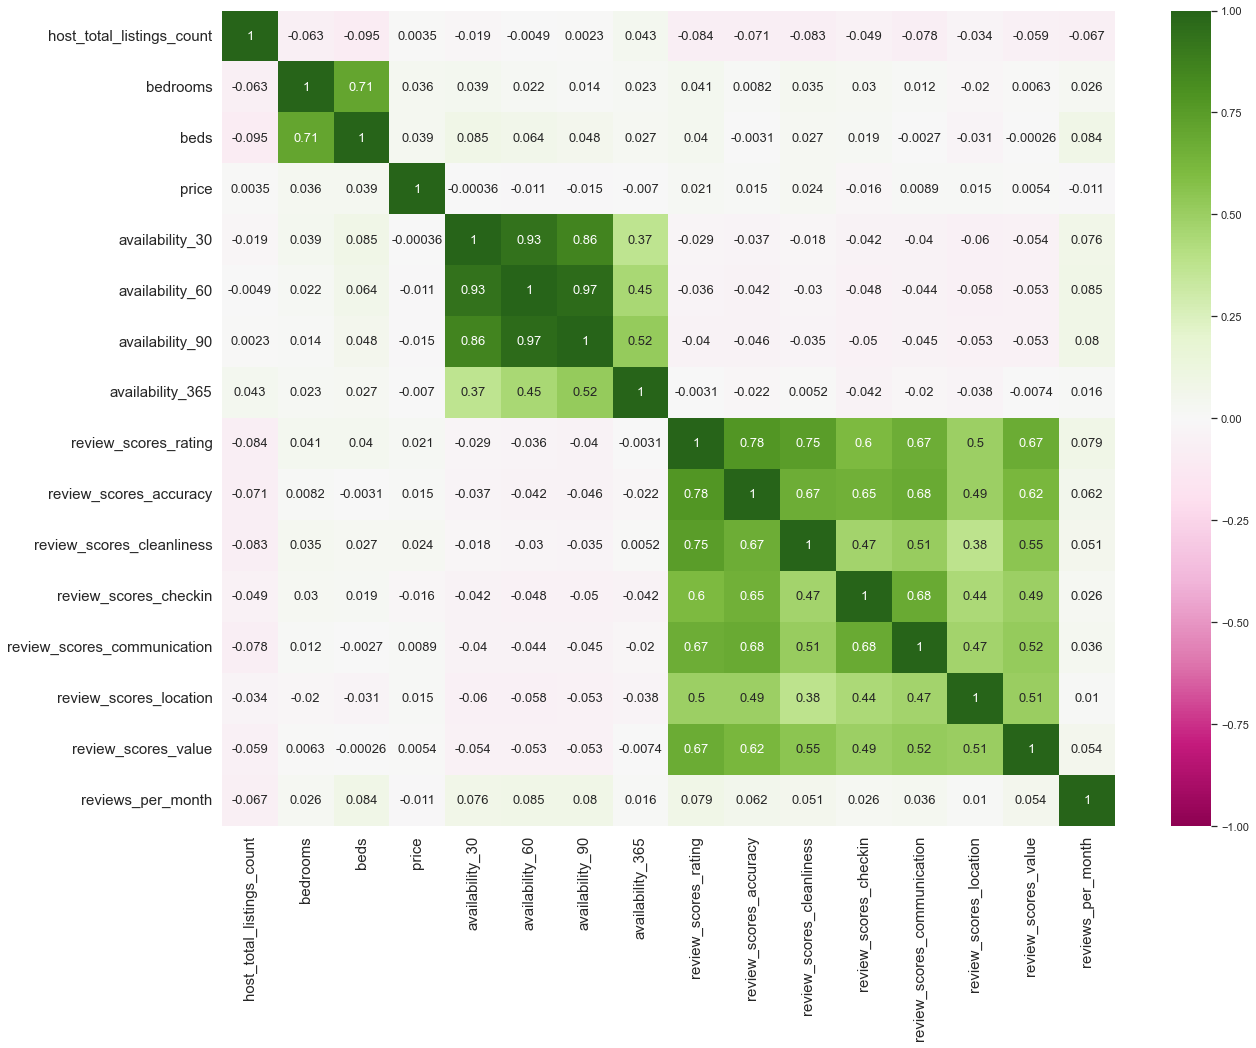

In [78]:
# correlation matrix heatmap
sns.set(rc={'figure.figsize': (20,15)})
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
x=sns.heatmap(corr,annot=True,vmax=1,vmin=-1,cmap="PiYG",annot_kws={"size":13})